# 📘 Importing Essential Libraries

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
%matplotlib inline
import yfinance as yf

from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.ensemble import RandomForestRegressor
from sklearn import metrics

# 📥 Loading and Inspecting the Dataset

In [2]:
tesla= yf.Ticker("TSLA")
tesla=tesla.history(period="max")
tesla.head()

,Open,High,Low,Close,Volume,Dividends,Stock Splits
Date,,,,,,,
2010-06-29 00:00:00-04:00,1.266667,1.666667,1.169333,1.592667,281494500,0.0,0.0
2010-06-30 00:00:00-04:00,1.719333,2.028000,1.553333,1.588667,257806500,0.0,0.0
2010-07-01 00:00:00-04:00,1.666667,1.728000,1.351333,1.464000,123282000,0.0,0.0
2010-07-02 00:00:00-04:00,1.533333,1.540000,1.247333,1.280000,77097000,0.0,0.0
2010-07-06 00:00:00-04:00,1.333333,1.333333,1.055333,1.074000,103003500,0.0,0.0


In [3]:
tesla.to_csv("tesla.csv", index = False)

In [4]:
tesla.shape

(3803, 7)

In [5]:
tesla.info

<bound method DataFrame.info of                                  Open        High         Low       Close  \
Date                                                                        
2010-06-29 00:00:00-04:00    1.266667    1.666667    1.169333    1.592667   
2010-06-30 00:00:00-04:00    1.719333    2.028000    1.553333    1.588667   
2010-07-01 00:00:00-04:00    1.666667    1.728000    1.351333    1.464000   
2010-07-02 00:00:00-04:00    1.533333    1.540000    1.247333    1.280000   
2010-07-06 00:00:00-04:00    1.333333    1.333333    1.055333    1.074000   
...                               ...         ...         ...         ...   
2025-08-05 00:00:00-04:00  308.950012  312.450012  305.500000  308.720001   
2025-08-06 00:00:00-04:00  307.890015  320.470001  306.929993  319.910004   
2025-08-07 00:00:00-04:00  319.790009  322.399994  316.160004  322.269989   
2025-08-08 00:00:00-04:00  321.429993  335.149994  320.980011  329.649994   
2025-08-11 00:00:00-04:00  335.000000  346.6

In [6]:
tesla.isnull().sum

<bound method DataFrame.sum of                             Open   High    Low  Close  Volume  Dividends  \
Date                                                                       
2010-06-29 00:00:00-04:00  False  False  False  False   False      False   
2010-06-30 00:00:00-04:00  False  False  False  False   False      False   
2010-07-01 00:00:00-04:00  False  False  False  False   False      False   
2010-07-02 00:00:00-04:00  False  False  False  False   False      False   
2010-07-06 00:00:00-04:00  False  False  False  False   False      False   
...                          ...    ...    ...    ...     ...        ...   
2025-08-05 00:00:00-04:00  False  False  False  False   False      False   
2025-08-06 00:00:00-04:00  False  False  False  False   False      False   
2025-08-07 00:00:00-04:00  False  False  False  False   False      False   
2025-08-08 00:00:00-04:00  False  False  False  False   False      False   
2025-08-11 00:00:00-04:00  False  False  False  False   F

<Axes: xlabel='Date'>

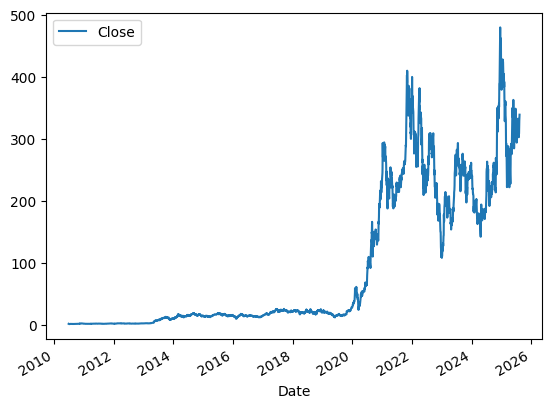

In [7]:
tesla.plot.line(y="Close", use_index=True)

In [8]:
tesla = tesla.drop(["Dividends", "Stock Splits"], axis =1)

tesla

,Open,High,Low,Close,Volume
Date,,,,,
2010-06-29 00:00:00-04:00,1.266667,1.666667,1.169333,1.592667,281494500
2010-06-30 00:00:00-04:00,1.719333,2.028000,1.553333,1.588667,257806500
2010-07-01 00:00:00-04:00,1.666667,1.728000,1.351333,1.464000,123282000
2010-07-02 00:00:00-04:00,1.533333,1.540000,1.247333,1.280000,77097000
2010-07-06 00:00:00-04:00,1.333333,1.333333,1.055333,1.074000,103003500
...,...,...,...,...,...
2025-08-05 00:00:00-04:00,308.950012,312.450012,305.500000,308.720001,57961300
2025-08-06 00:00:00-04:00,307.890015,320.470001,306.929993,319.910004,78523600
2025-08-07 00:00:00-04:00,319.790009,322.399994,316.160004,322.269989,66658700


In [9]:
tesla["Tomorrow"] = tesla["Close"].shift(-1)

tesla

,Open,High,Low,Close,Volume,Tomorrow
Date,,,,,,
2010-06-29 00:00:00-04:00,1.266667,1.666667,1.169333,1.592667,281494500,1.588667
2010-06-30 00:00:00-04:00,1.719333,2.028000,1.553333,1.588667,257806500,1.464000
2010-07-01 00:00:00-04:00,1.666667,1.728000,1.351333,1.464000,123282000,1.280000
2010-07-02 00:00:00-04:00,1.533333,1.540000,1.247333,1.280000,77097000,1.074000
2010-07-06 00:00:00-04:00,1.333333,1.333333,1.055333,1.074000,103003500,1.053333
...,...,...,...,...,...,...
2025-08-05 00:00:00-04:00,308.950012,312.450012,305.500000,308.720001,57961300,319.910004
2025-08-06 00:00:00-04:00,307.890015,320.470001,306.929993,319.910004,78523600,322.269989
2025-08-07 00:00:00-04:00,319.790009,322.399994,316.160004,322.269989,66658700,329.649994


In [10]:
tesla= tesla.loc["1990-01-01":].copy()

In [11]:
tesla=tesla.dropna()

In [12]:
tesla

,Open,High,Low,Close,Volume,Tomorrow
Date,,,,,,
2010-06-29 00:00:00-04:00,1.266667,1.666667,1.169333,1.592667,281494500,1.588667
2010-06-30 00:00:00-04:00,1.719333,2.028000,1.553333,1.588667,257806500,1.464000
2010-07-01 00:00:00-04:00,1.666667,1.728000,1.351333,1.464000,123282000,1.280000
2010-07-02 00:00:00-04:00,1.533333,1.540000,1.247333,1.280000,77097000,1.074000
2010-07-06 00:00:00-04:00,1.333333,1.333333,1.055333,1.074000,103003500,1.053333
...,...,...,...,...,...,...
2025-08-04 00:00:00-04:00,309.079987,312.119995,303.000000,309.260010,78683900,308.720001
2025-08-05 00:00:00-04:00,308.950012,312.450012,305.500000,308.720001,57961300,319.910004
2025-08-06 00:00:00-04:00,307.890015,320.470001,306.929993,319.910004,78523600,322.269989


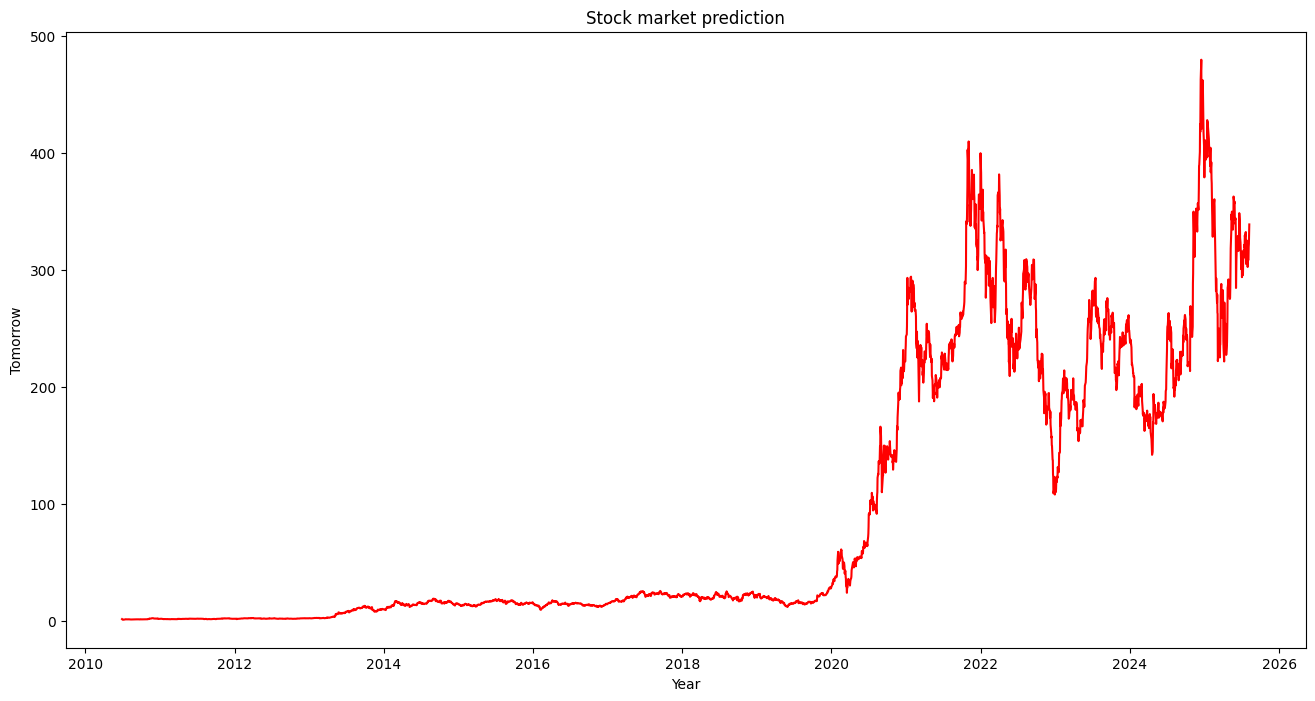

In [13]:

plt.figure(figsize=(16,8))
plt.title('Stock market prediction')
plt.xlabel('Year')
plt.ylabel('Tomorrow')
plt.plot(tesla['Tomorrow'],color='red')
plt.show()

In [14]:
x=tesla[['Open','High','Low','Close','Volume']]

y=tesla['Tomorrow']

In [15]:
from sklearn.preprocessing import StandardScaler
scaler=StandardScaler()
scaler.fit(x)
x=scaler.transform(x)

In [16]:
x

array([[-0.77539673, -0.77200044, -0.77676318, -0.77296832,  2.40868628],
       [-0.77147748, -0.76894123, -0.77335399, -0.77300298,  2.09929928],
       [-0.77193347, -0.77148117, -0.77514737, -0.7740832 ,  0.34228597],
       ...,
       [ 1.87939799,  1.92713355,  1.93781449,  1.98518081, -0.24229977],
       [ 1.98243007,  1.94347375,  2.01975957,  2.00562956, -0.39726624],
       [ 1.99662932,  2.05142104,  2.06255214,  2.06957566, -0.07673045]],
      shape=(3802, 5))

## 🤖 Model Training: Regression Algorithms


In [17]:

x_train,x_test,y_train,y_test=train_test_split(x,y,test_size=0.2,random_state = 42)

lr=LinearRegression()
lr.fit(x_train,y_train)
ylr_pred=lr.predict(x_test)

rf=RandomForestRegressor()
rf.fit(x_train,y_train)
yrf_pred=rf.predict(x_test)

## 📈 Model Evaluation Metrics

In [18]:

print('MSE:' , metrics.mean_squared_error(y_test,ylr_pred))
print('RMSE:' , np.sqrt(metrics.mean_squared_error(y_test,ylr_pred)))
print('MAE:' , metrics.mean_absolute_error(y_test,ylr_pred))
print('R2:' , metrics.r2_score(y_test,ylr_pred))

MSE: 30.79695118923305
RMSE: 5.549500084623213
MAE: 2.4091297413288517
R2: 0.9975163782373015


In [19]:
print('MSE:' , metrics.mean_squared_error(y_test,yrf_pred))
print('RMSE:' , np.sqrt(metrics.mean_squared_error(y_test,yrf_pred)))
print('MAE:' , metrics.mean_absolute_error(y_test,yrf_pred))
print('R2:' , metrics.r2_score(y_test,yrf_pred))

MSE: 32.72168578393102
RMSE: 5.7202872116643775
MAE: 2.5449833641055375
R2: 0.9973611579137884


## 📝 Summary of Insights and Results


In [20]:
y_pred=lr.predict(x_test)
result=pd.DataFrame({'Actual':y_test,'Predicted':y_pred,'Loss':abs(y_test-y_pred)})
result


,Actual,Predicted,Loss
Date,,,
2019-05-02 00:00:00-04:00,17.002001,16.612404,0.389597
2012-07-31 00:00:00-04:00,1.750000,1.891838,0.141838
2012-05-21 00:00:00-04:00,2.053333,1.973538,0.079795
2016-01-26 00:00:00-05:00,12.538000,12.992413,0.454413
2017-01-20 00:00:00-05:00,16.594667,16.410793,0.183874
...,...,...,...
2019-06-03 00:00:00-04:00,12.906667,12.220955,0.685712
2015-08-25 00:00:00-04:00,14.989333,14.788942,0.200392
2014-04-04 00:00:00-04:00,13.834667,14.436321,0.601654


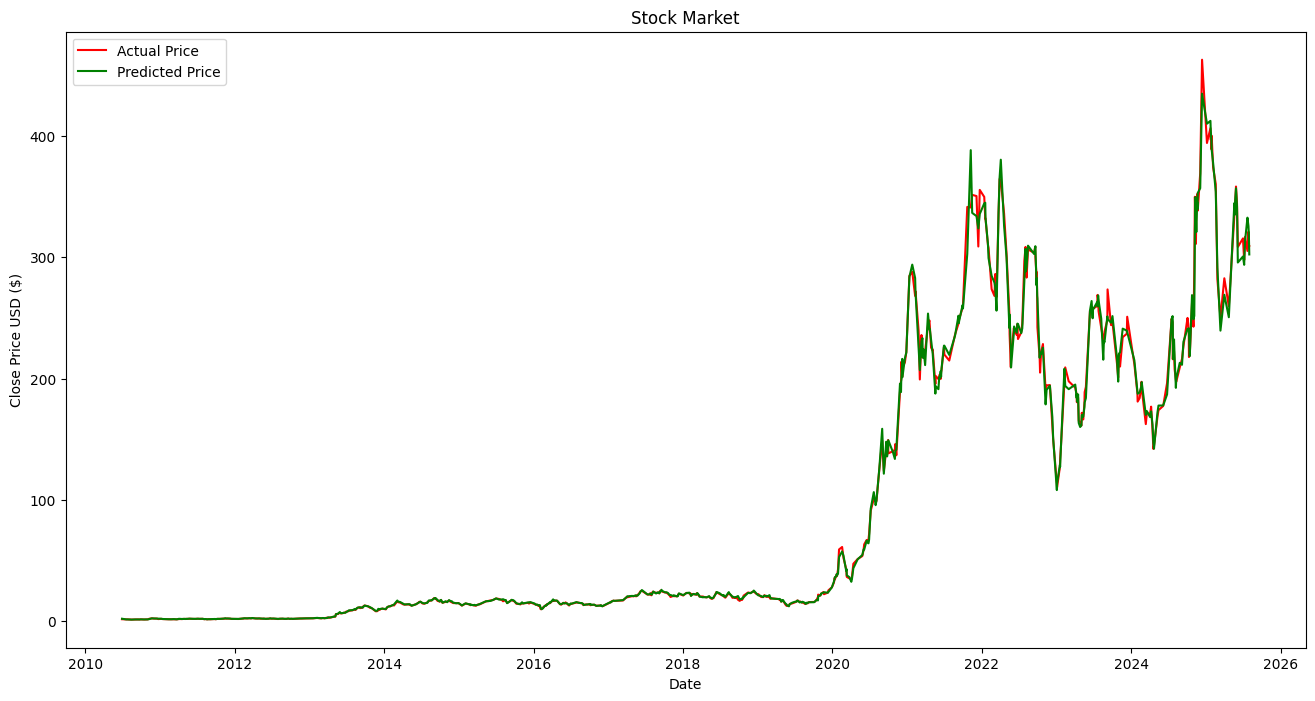

In [21]:
predicted_prices = lr.predict(x_test)

# Make sure both actual and predicted are aligned and sorted by date
actual = pd.Series(y_test.values, index=y_test.index)
predicted = pd.Series(predicted_prices, index=y_test.index)

actual = actual.sort_index()
predicted = predicted.sort_index()

# Plot them
plt.figure(figsize=(16,8))
plt.title('Stock Market')
plt.xlabel('Date')
plt.ylabel('Close Price USD ($)')

plt.plot(actual.index, actual, color='red', label='Actual Price')
plt.plot(predicted.index, predicted, color='green', label='Predicted Price')

plt.legend()
plt.show()